# CICIDS2017 Data Exploration

This notebook explores the CICIDS2017 dataset. It handles the loading of multiple PCAP CSV files, cleans the column names, handles missing/infinite values, and analyzes the class distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

## 1. Load Data

CICIDS2017 consists of multiple CSV files. We will load all of them and concatenate them into a single DataFrame.

In [2]:
# Define path to data
data_path = '../../data/raw/cicids2017'

# Get all CSV files
all_files = glob.glob(os.path.join(data_path, "*.csv"))

print(f"Found {len(all_files)} files:")
for f in all_files:
    print(os.path.basename(f))

Found 8 files:
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [3]:
# Read and concatenate all files
li = []

for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_temp)

df = pd.concat(li, axis=0, ignore_index=True)

print(f"Total shape: {df.shape}")

Total shape: (2830743, 79)


## 2. Data Cleaning

In [4]:
# Strip whitespace from column names (common issue in CICIDS17)
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

Columns: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE F

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 1358


In [6]:
# Replace Infinity with NaN and drop
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Missing values after replacing inf:\n", df.isnull().sum().sum())

df.dropna(inplace=True)
print("Shape after dropping NaNs:", df.shape)

Missing values after replacing inf:
 5734
Shape after dropping NaNs: (2827876, 79)


## 3. Exploratory Data Analysis

c:\Users\musab\Projects\NIDS-DL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


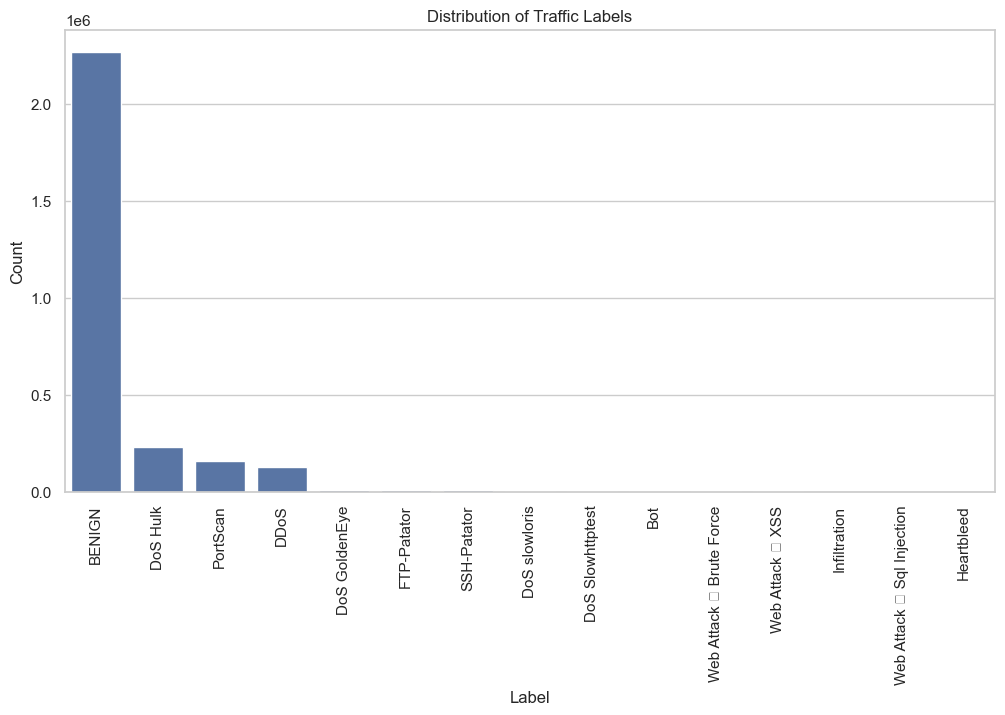

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [7]:
# Label Distribution
plt.figure(figsize=(12, 6))
label_counts = df['Label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Traffic Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print(label_counts)

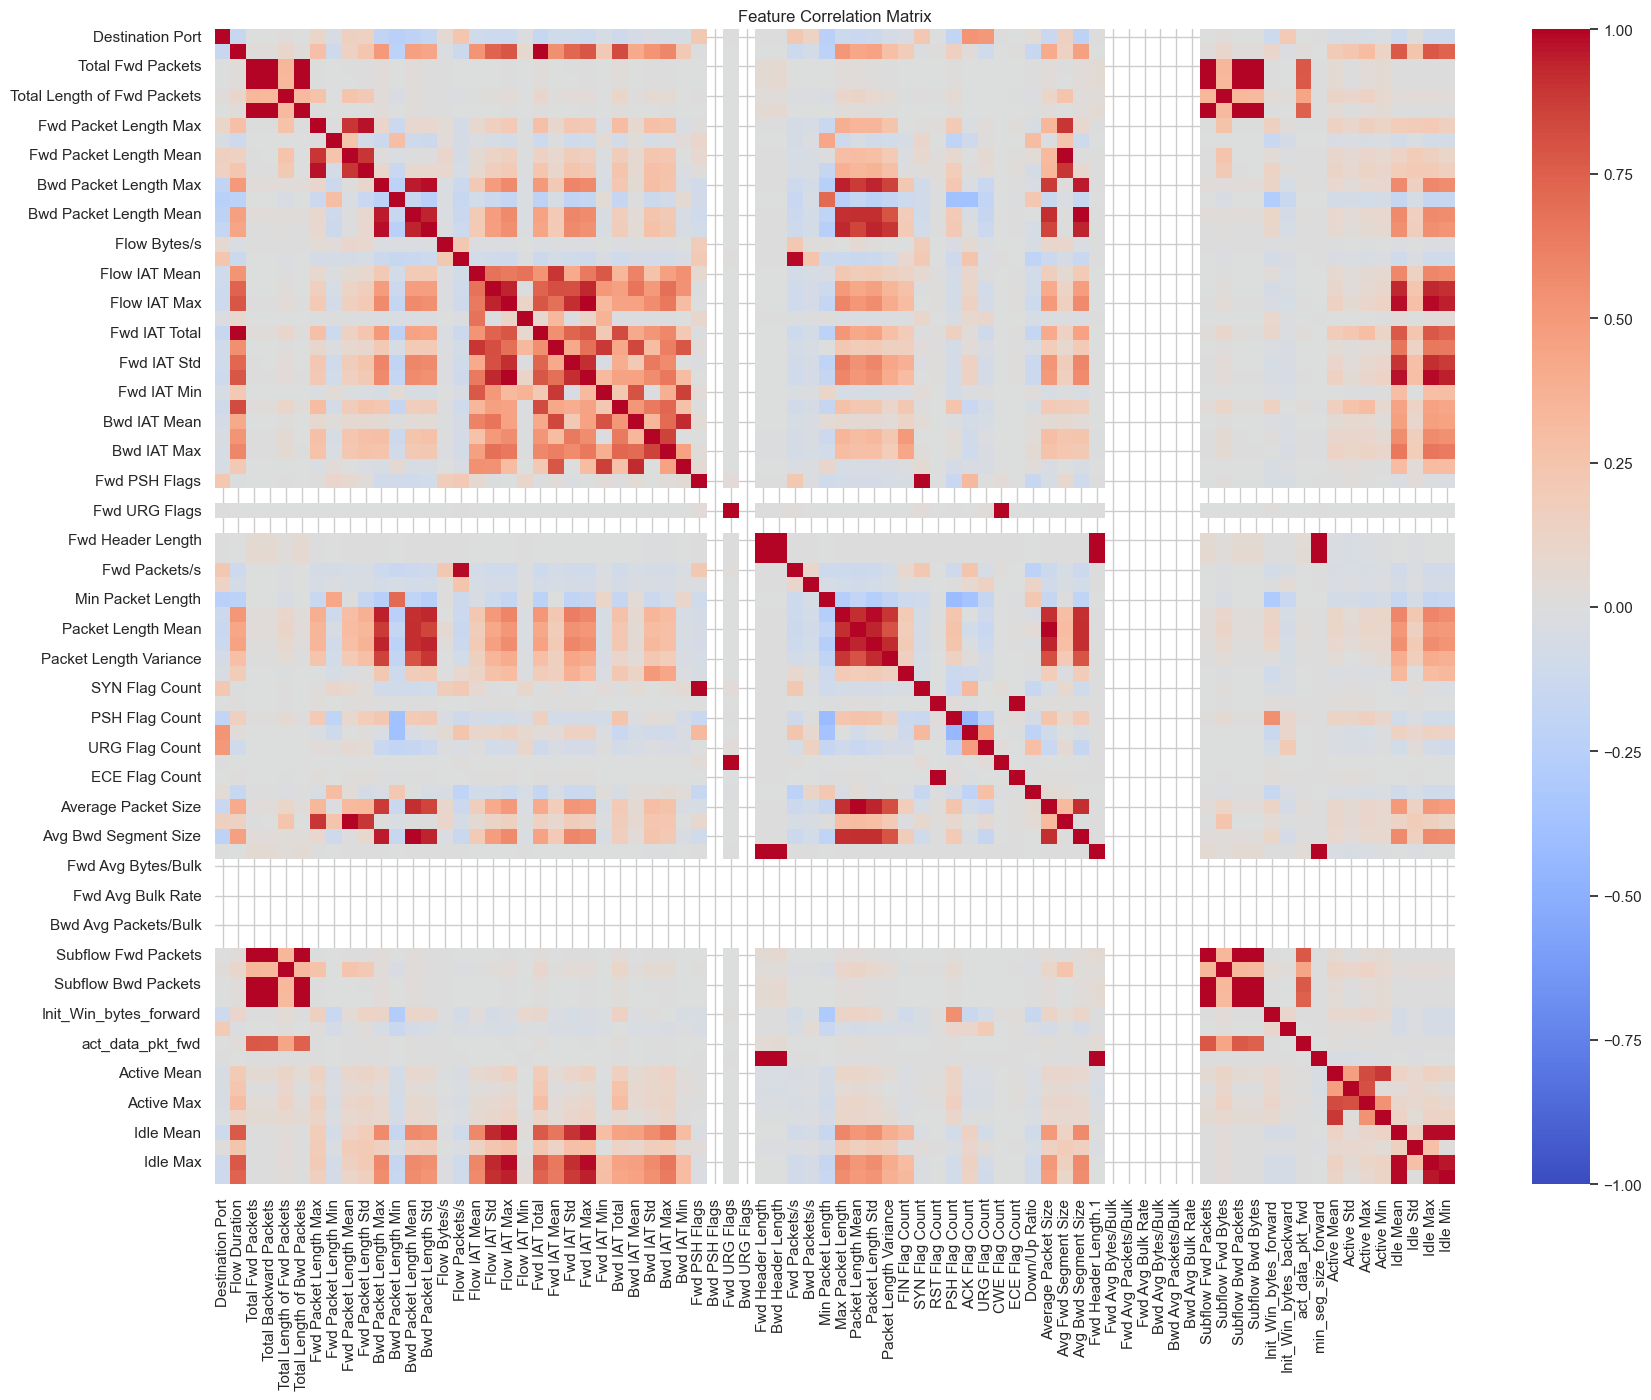

In [8]:
# Correlation Matrix (Numerical Features)
# Sample a subset if dataset is too large to plot quickly
df_sample = df.sample(n=100000, random_state=42) if len(df) > 100000 else df

numeric_df = df_sample.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 15))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()